# HW 1

Problem: 

The fraud data refers to information collected and analyzed to identify fraudulent activities, such as illegal financial transactions, embezzlement, identity theft, and other forms of deception. Our team will work on this data and will analyze the information to uncover patterns and anomalies that may indicate fraudulent behavior, and then develop strategies to prevent and mitigate these types of incidents. The problem that we team will be working on is to develop an effective method of detecting fraud and protecting against financial losses, while also ensuring that legitimate transactions are not impeded. This will involve machine learning algorithms, and other tools to identify high-risk activities, and then implementing appropriate measures to prevent fraud from occurring.


Source: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

Data Description

This is a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud.We collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Below are all the columns from the dataset we’re using here:



step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction


# Teacher Note

your feature set seemed a little insufficient to me to do a business strategy. However, its not a big problem, the goal is the robust implementation of feature engineering, selection and model fit. Make sure you utilize imbalance dataset problems (u can check what other people use for this from the literature review). If you had some text data we could even apply a graph analysis for fraud. Please do a literature review for that as well

# HW 2

The team will pick 3 journal papers from (preferably) the top-ranked business journals, such as SMJ, Management Science, MISQ ISR, Marketing Science, and Academy of Management Journal (AMJ), about the selected topic and will discuss/compare the empirical validation methods used in these papers for hypothesis testing.

For example, if your team picks a topic about predicting market volatility and uses the Kaggle dataset to analyze this use case, they can review/compare the implementation on this paper that adopts a quantile regression approach on a similar use case. Google Scholar should be a great source to access these articles.

Another example could be as follows: Assume you picked a topic to analyze Employee Churn Prediction in a company. You can search for articles about churn prediction and analyze how different models were adopted to validate the empirical results and hypotheses proposed in those papers.

The goal of this stage is to explore the usage of the techniques learned in class for an academic article publication.

Please review the Final Project information and Final Project Guidelines before completing this assignment.

Submission: 3 pages of analysis (1 paper per page). Each page should include the problem covered in the paper, proposed models for solutions, and compare the implementation with your own project topic (similarities, relevance, adaptability of proposed model to your project).

# HW 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#df = pd.read_csv('onlinefraud.csv')

In [3]:
df = df = pd.read_csv('onlinefraud.csv', nrows=100000)

# 1. Getting familiar with the data

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


<AxesSubplot:>

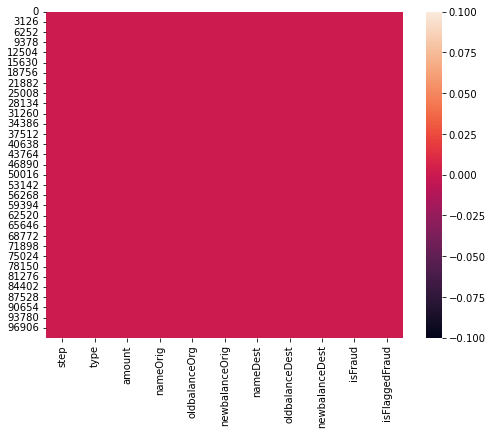

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

In [8]:
df.shape

(100000, 11)

# 2. Exploratory Data Analysis (EDA)

Univariate Analysis

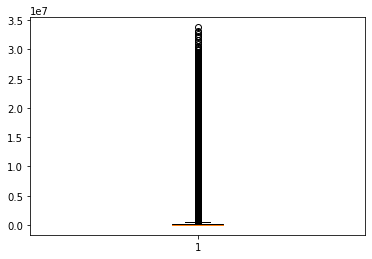

In [9]:
# Plot a box plot for the "amount" column
plt.boxplot(df['oldbalanceOrg'])
plt.show()

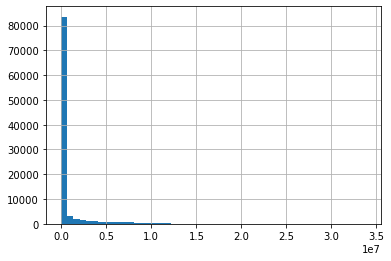

In [10]:
# Plot a histogram for the "amount" column
df['oldbalanceOrg'].hist(bins=50)
plt.show()

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64


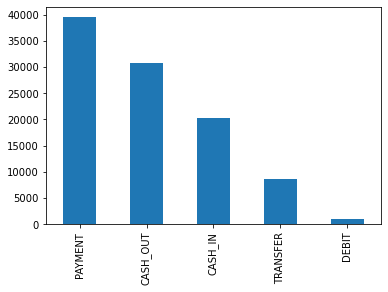

In [11]:
# Frequency distribution of "type" column
print(df['type'].value_counts())

# Bar plot of "type" column
df['type'].value_counts().plot.bar()
plt.show()

0    99884
1      116
Name: isFraud, dtype: int64


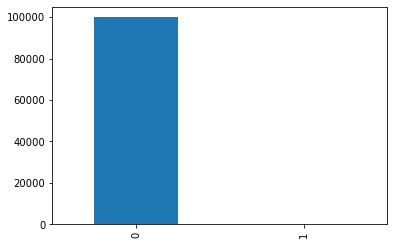

In [12]:
# Frequency distribution of "isFraud" column
print(df['isFraud'].value_counts())

# Bar plot of "isFraud" column
df['isFraud'].value_counts().plot.bar()
plt.show()

Text(0, 0.5, 'Count')

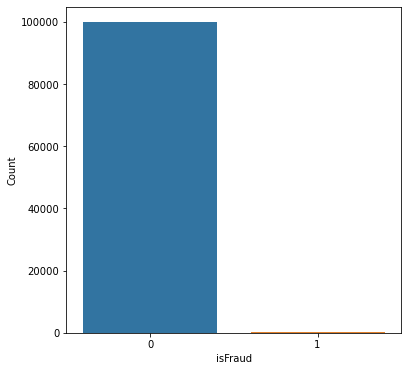

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(df['isFraud'])
plt.xlabel('isFraud')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

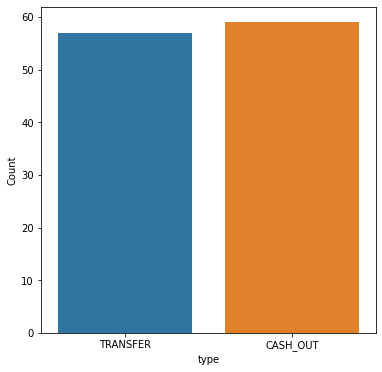

In [14]:
plt.figure(figsize=(6,6))
df_default = df[df['isFraud']==1]
sns.countplot(df_default['type'])
plt.xlabel('type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

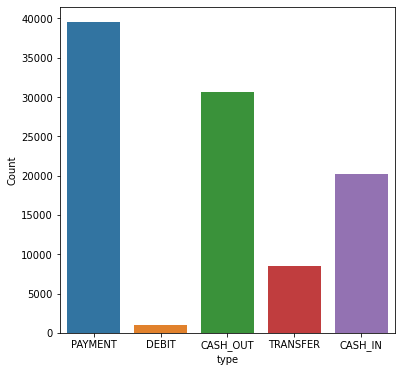

In [15]:
plt.figure(figsize=(6,6))
df_default = df[df['isFraud']==0]
sns.countplot(df_default['type'])
plt.xlabel('type')
plt.ylabel('Count')

In [16]:
df.groupby('type')['step'].count()

type
CASH_IN     20185
CASH_OUT    30718
DEBIT         988
PAYMENT     39512
TRANSFER     8597
Name: step, dtype: int64

Text(0, 0.5, 'Count')

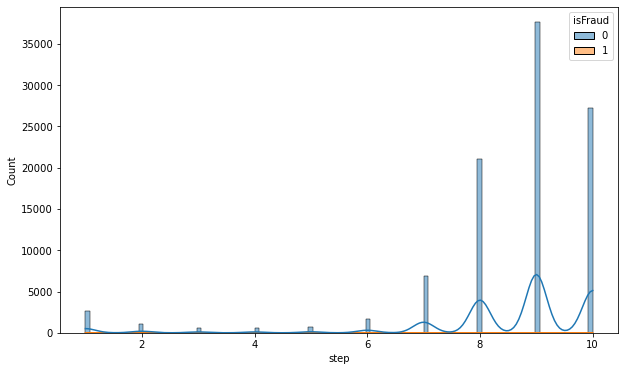

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "step", kde = True, hue = "isFraud")
plt.xlabel('step')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

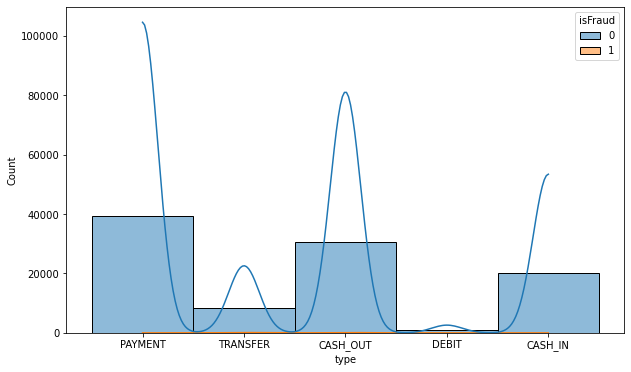

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "type", kde = True, hue = "isFraud")
plt.xlabel('type')
plt.ylabel('Count')

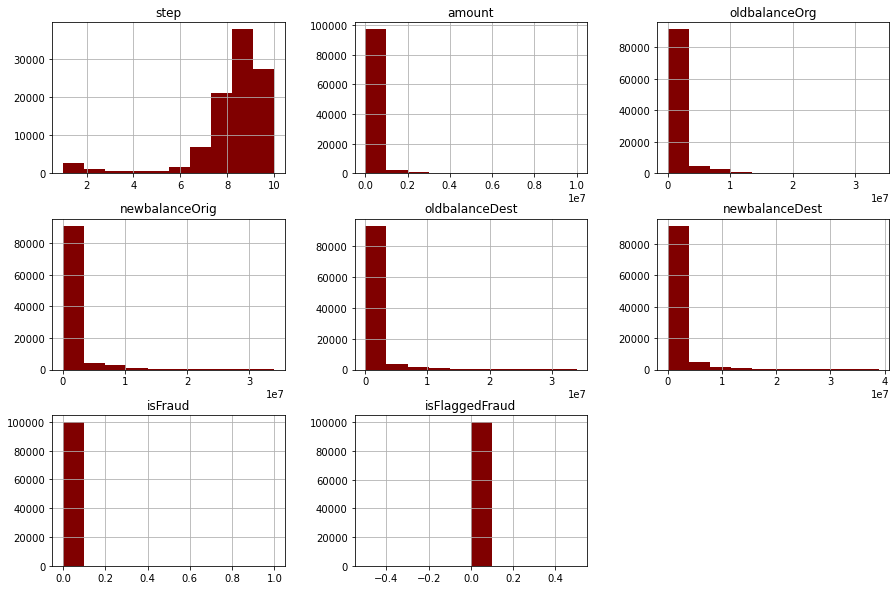

In [19]:
fig = plt.figure(figsize = (15, 10));
ax = fig.gca();
df.hist(ax = ax, color = 'maroon')
pass

In [20]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.076026,-0.003769,-0.003846,0.009470,0.011325,-0.051329,NaN
amount,0.076026,1.000000,-0.011420,-0.017804,0.245814,0.373313,0.036422,NaN
oldbalanceOrg,-0.003769,-0.011420,1.000000,0.998846,0.106192,0.074833,-0.004144,NaN
newbalanceOrig,-0.003846,-0.017804,0.998846,1.000000,0.107784,0.073759,-0.010872,NaN
oldbalanceDest,0.009470,0.245814,0.106192,0.107784,1.000000,0.938675,-0.009266,NaN
newbalanceDest,0.011325,0.373313,0.074833,0.073759,0.938675,1.000000,-0.006394,NaN
isFraud,-0.051329,0.036422,-0.004144,-0.010872,-0.009266,-0.006394,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Bivariate Analysis

In [21]:
# Create a contingency table of "isFraud" and "type"
contingency_table = pd.crosstab(df['isFraud'], df['type'])

# Perform a chi-square test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", stat)
print("P-value:", p)

Chi-square statistic: 307.8430555995066
P-value: 2.2021231459327e-65


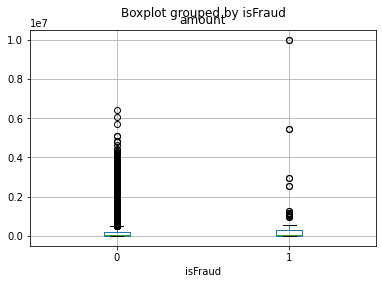

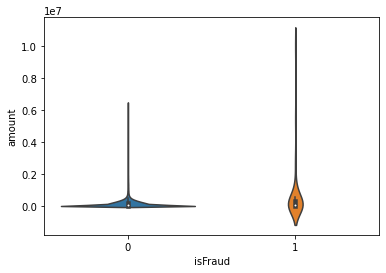

In [22]:
# Box plot of "amount" for "isFraud" categories
df.boxplot(column='amount', by='isFraud')
plt.show()

# Violin plot of "amount" for "isFraud" categories
import seaborn as sns
sns.violinplot(x='isFraud', y='amount', data=df)
plt.show()

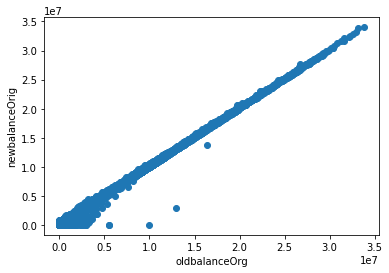

Correlation coefficient: 0.9988463448417012
P-value: 0.0


In [23]:
# Scatter plot of "oldbalanceOrg" vs "newbalanceOrig"
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'])
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.show()

# Calculate the correlation coefficient
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['oldbalanceOrg'], df['newbalanceOrig'])
print("Correlation coefficient:", corr)
print("P-value:", p_value)

Multivariate Analysis

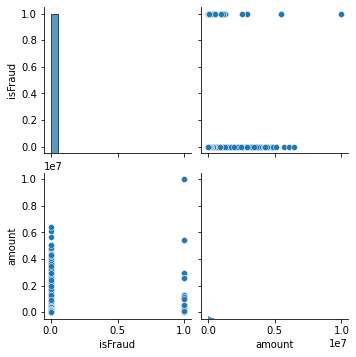

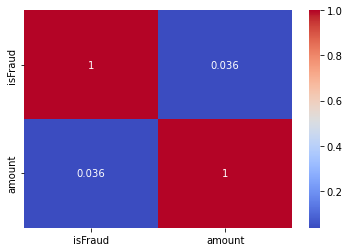

In [24]:
# Scatter plot matrix of "isFraud", "type", and "amount"
sns.pairplot(df[['isFraud', 'type', 'amount']])
plt.show()

# Heatmap of correlation between "isFraud", "type", and "amount"
corr_matrix = df[['isFraud', 'type', 'amount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

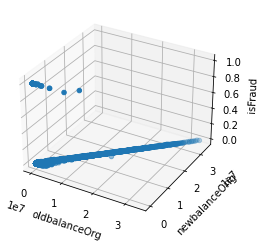

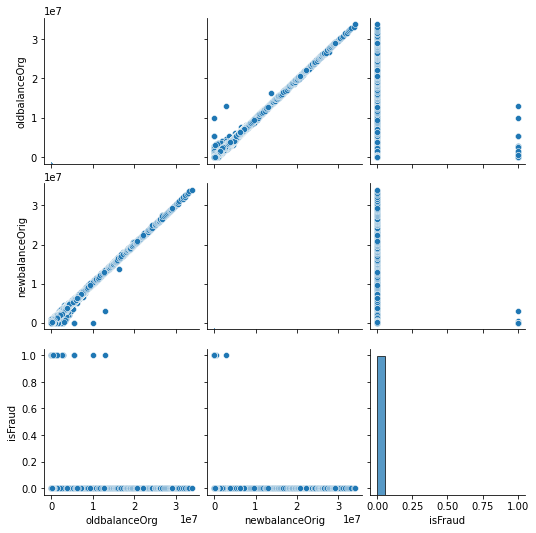

In [25]:
# 3D scatter plot of "oldbalanceOrg", "newbalanceOrig", and "isFraud"
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], df['isFraud'])
ax.set_xlabel('oldbalanceOrg')
ax.set_ylabel('newbalanceOrig')
ax.set_zlabel('isFraud')
plt.show()

# Scatter plot matrix of "oldbalanceOrg", "newbalanceOrig", and "isFraud"
sns.pairplot(df[['oldbalanceOrg', 'newbalanceOrig', 'isFraud']])
plt.show()

Outlier Detection

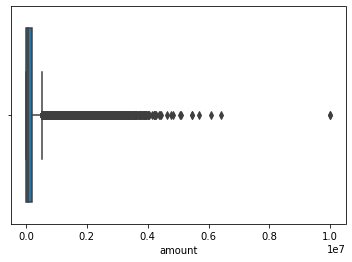

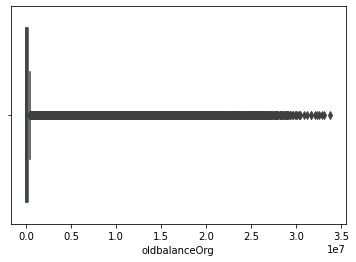

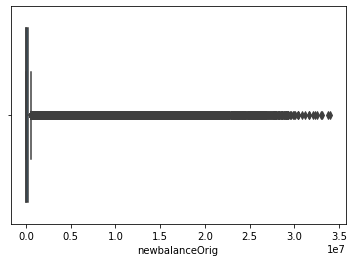

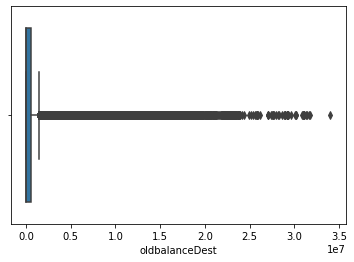

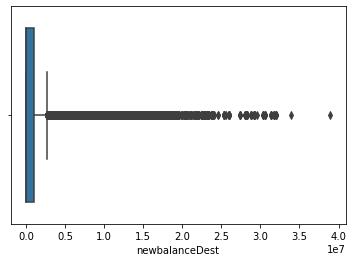

In [26]:
# Box plot of "amount"
sns.boxplot(x=df['amount'])
plt.show()

# Box plot of "oldbalanceOrg"
sns.boxplot(x=df['oldbalanceOrg'])
plt.show()

# Box plot of "newbalanceOrig"
sns.boxplot(x=df['newbalanceOrig'])
plt.show()

# Box plot of "oldbalanceDest"
sns.boxplot(x=df['oldbalanceDest'])
plt.show()

# Box plot of "newbalanceDest"
sns.boxplot(x=df['newbalanceDest'])
plt.show()

A z-score greater than 3 or less than -3 is considered an outlier.

In [27]:
# Calculate the z-score for "amount"
from scipy.stats import zscore
df['amount_zscore'] = zscore(df['amount'])
outliers = df[(df['amount_zscore'] > 3) | (df['amount_zscore'] < -3)]
print(outliers)

       step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
85        1  TRANSFER  1505626.01   C926859124           0.00             0.0   
89        1  TRANSFER  1429051.47  C1520267010           0.00             0.0   
94        1  TRANSFER  1724887.05  C1495608502           0.00             0.0   
358       1  TRANSFER  1538200.39   C476579021           0.00             0.0   
359       1  TRANSFER  2421578.09   C106297322           0.00             0.0   
...     ...       ...         ...          ...            ...             ...   
99929    10  TRANSFER  1428341.97   C344874698       90602.00             0.0   
99930    10  TRANSFER  1707531.43   C407521144       31384.00             0.0   
99937    10  TRANSFER  1966197.94   C620820455       19534.00             0.0   
99961    10  TRANSFER  1295693.90   C158104172      178872.78             0.0   
99974    10  TRANSFER  2920612.16   C204961550       49919.00             0.0   

          nameDest  oldbala

Data points that are more than 1.5 times the IQR below the first quartile or above the third quartile are considered outliers

In [28]:
# Calculate the IQR for "oldbalanceOrg"
Q1 = df['oldbalanceOrg'].quantile(0.25)
Q3 = df['oldbalanceOrg'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
outliers = df[(df['oldbalanceOrg'] < (Q1 - 1.5 * IQR)) | (df['oldbalanceOrg'] > (Q3 + 1.5 * IQR))]
print(outliers)

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
14        1   PAYMENT    4098.78  C1026483832      503264.00       499165.22   
62        1     DEBIT    8727.74   C166694583      882770.00       874042.26   
63        1   PAYMENT    2599.46   C885910946      874042.26       871442.79   
241       1   PAYMENT    4635.18  C1110698130     6313782.05      6309146.87   
242       1   PAYMENT    1267.97  C1053632127     6309146.87      6307878.90   
...     ...       ...        ...          ...            ...             ...   
99925    10   PAYMENT    5354.04   C188009838     3762749.80      3757395.76   
99926    10   PAYMENT    2624.51   C493120200     3757395.76      3754771.25   
99935    10   PAYMENT    1956.80  C1956363687     1443925.64      1441968.84   
99936    10  CASH_OUT  146494.55  C1629641318     1441968.84      1295474.29   
99943    10   CASH_IN  137851.05  C1075450889      569109.00       706960.05   

          nameDest  oldbalanceDest  new

Feature Engineering

In [29]:
df['amount_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [30]:
df['hour'] = pd.to_datetime(df['step'], unit='h').dt.hour

In [31]:
def account_type(name):
    if name.startswith('C'):
        return 'customer'
    elif name.startswith('M'):
        return 'merchant'
    else:
        return 'unknown'

df['account_type'] = df['nameOrig'].apply(account_type)

In [32]:
freq = df.groupby('nameOrig')['step'].diff().fillna(0)
df['transaction_freq'] = freq.apply(lambda x: 1 if x == 0 else 1/x)

In [33]:
df['transaction_volume'] = df.groupby('nameOrig')['amount'].cumsum()

In [34]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_zscore,amount_diff,hour,account_type,transaction_freq,transaction_volume
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-0.475641,9839.64,1,customer,1,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-0.498805,1864.28,1,customer,1,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-0.503694,181.00,1,customer,1,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-0.503694,181.00,1,customer,1,181.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-0.470330,11668.14,1,customer,1,11668.14


More EDA with the Feature Engineering data points

Text(0.5, 1.0, 'Transaction Amount Difference vs. Fraudulent Transactions')

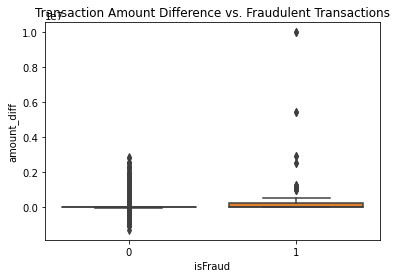

In [35]:
sns.boxplot(x='isFraud', y='amount_diff', data=df)
plt.title('Transaction Amount Difference vs. Fraudulent Transactions')

Text(0.5, 1.0, 'Account Type vs. Fraudulent Transactions')

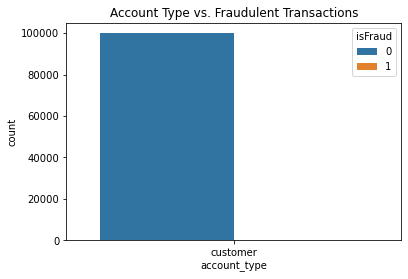

In [36]:
sns.countplot(x='account_type', hue='isFraud', data=df)
plt.title('Account Type vs. Fraudulent Transactions')

Text(0.5, 1.0, 'Transaction Frequency vs. Fraudulent Transactions')

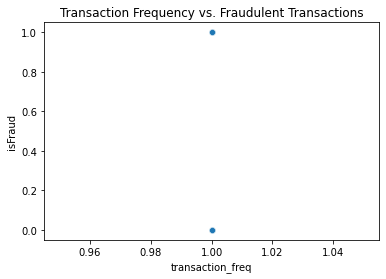

In [37]:
sns.scatterplot(x='transaction_freq', y='isFraud', data=df)
plt.title('Transaction Frequency vs. Fraudulent Transactions')

# 3. Splitting features and target variable

In [38]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'amount_zscore', 'amount_diff', 'hour',
       'account_type', 'transaction_freq', 'transaction_volume'],
      dtype='object')

In [39]:
X = df.drop(columns=['isFraud'])

In [40]:
y = df['isFraud']

# 4. Get dummies

In [41]:
X = pd.get_dummies(X, columns=['type', 'account_type',], drop_first=True)

In [42]:
X['nameOrig'] = X['nameOrig'].str[1:]
X['nameDest'] = X['nameDest'].str[1:]

In [43]:
X.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,amount_zscore,amount_diff,hour,transaction_freq,transaction_volume,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,-0.475641,9839.64,1,1,9839.64,0,0,1,0
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,-0.498805,1864.28,1,1,1864.28,0,0,1,0
2,1,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0,-0.503694,181.00,1,1,181.00,0,0,0,1
3,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0,-0.503694,181.00,1,1,181.00,1,0,0,0
4,1,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,-0.470330,11668.14,1,1,11668.14,0,0,1,0


# 5. Split into train test set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res, y_res=sm.fit_resample(X,y)

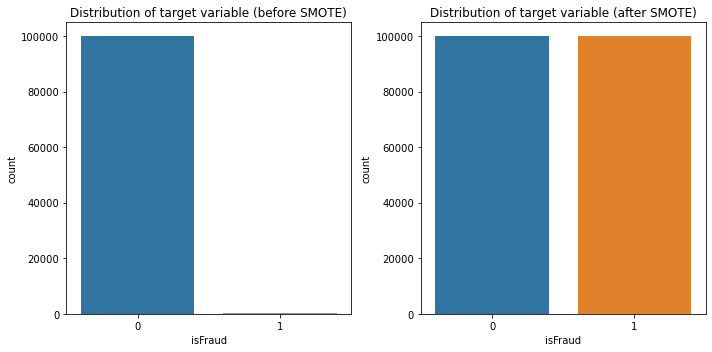

In [46]:
# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the distribution of the original data
sns.countplot(x=y, ax=axs[0])
axs[0].set_title('Distribution of target variable (before SMOTE)')

# Plot the distribution of the resampled data
sns.countplot(x=y_res, ax=axs[1])
axs[1].set_title('Distribution of target variable (after SMOTE)')

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
#split imbalanced datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#split balanced datasets
xb_train,xb_test,yb_train,yb_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

# 6. Feature Standardization

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
#scale imbalanced data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
#scale balanced data
scaler_b=StandardScaler()
scaler_b.fit(xb_train)
xb_train_scaled=scaler_b.transform(xb_train)
xb_test_scaled=scaler_b.transform(xb_test)

# 7. Modeling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import svm

Logistic Regression

In [53]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [54]:
print("\nConfusion Matrix for Logistic Regression Model with imbalanced dataset:\n\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression Model with imbalanced dataset:\n\n", classification_report(y_test, y_pred_lr))


Confusion Matrix for Logistic Regression Model with imbalanced dataset:

 [[19977     1]
 [   20     2]]

Classification Report for Logistic Regression Model with imbalanced dataset:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.67      0.09      0.16        22

    accuracy                           1.00     20000
   macro avg       0.83      0.55      0.58     20000
weighted avg       1.00      1.00      1.00     20000



In [55]:
lr_b = LogisticRegression(random_state=42)
lr_b.fit(xb_train_scaled, yb_train)
y_pred_lr_b = lr_b.predict(xb_test_scaled)

In [56]:
print("\nConfusion Matrix for Logistic Regression Model with balanced dataset:\n\n", confusion_matrix(yb_test, y_pred_lr_b))
print("\nClassification Report for Logistic Regression Model with balanced dataset:\n\n", classification_report(yb_test, y_pred_lr_b))


Confusion Matrix for Logistic Regression Model with balanced dataset:

 [[19338   628]
 [  739 19249]]

Classification Report for Logistic Regression Model with balanced dataset:

               precision    recall  f1-score   support

           0       0.96      0.97      0.97     19966
           1       0.97      0.96      0.97     19988

    accuracy                           0.97     39954
   macro avg       0.97      0.97      0.97     39954
weighted avg       0.97      0.97      0.97     39954



Random Forest

In [57]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)

In [58]:
print("\nConfusion Matrix for Random Forest Model with imbalanced dataset:\n\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Model with imbalanced dataset:\n\n", classification_report(y_test, y_pred_rf))


Confusion Matrix for Random Forest Model with imbalanced dataset:

 [[19978     0]
 [   13     9]]

Classification Report for Random Forest Model with imbalanced dataset:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       1.00      0.41      0.58        22

    accuracy                           1.00     20000
   macro avg       1.00      0.70      0.79     20000
weighted avg       1.00      1.00      1.00     20000



In [59]:
rf_b = RandomForestClassifier(random_state=42, max_depth=10)
rf_b.fit(xb_train, yb_train)
y_pred_rf_b=rf_b.predict(xb_test)

In [60]:
print("\nConfusion Matrix for Random Forest Model with balanced dataset:\n\n", confusion_matrix(yb_test, y_pred_rf_b))
print("\nClassification Report for Random Forest Model with balanced dataset:\n\n", classification_report(yb_test, y_pred_rf_b))


Confusion Matrix for Random Forest Model with balanced dataset:

 [[19801   165]
 [   30 19958]]

Classification Report for Random Forest Model with balanced dataset:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     19966
           1       0.99      1.00      1.00     19988

    accuracy                           1.00     39954
   macro avg       1.00      1.00      1.00     39954
weighted avg       1.00      1.00      1.00     39954



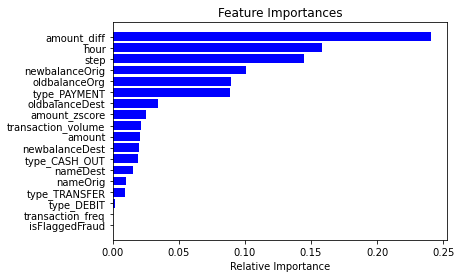

In [61]:
features = X.columns
importances_b = rf_b.feature_importances_
indices = np.argsort(importances_b)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_b[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

K Nearest Neighbors

In [62]:
knn=KNeighborsClassifier(3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
knn_hat=knn.predict(X_test)

In [64]:
print("\nConfusion Matrix for KNN Model with imbalanced dataset:\n\n", confusion_matrix(y_test.values,knn_hat))
print("\nClassification Report for KNN Model with imbalanced dataset:\n\n",classification_report(y_test.values,knn_hat))


Confusion Matrix for KNN Model with imbalanced dataset:

 [[19978     0]
 [   22     0]]

Classification Report for KNN Model with imbalanced dataset:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.00      0.00      0.00        22

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



In [65]:
knn_b=KNeighborsClassifier(3)
knn_b.fit(xb_train,yb_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
knn_b_hat=knn_b.predict(xb_test)

In [67]:
print("\nConfusion Matrix for KNN Model with balanced dataset:\n\n", confusion_matrix(yb_test.values,knn_b_hat))
print("\nClassification Report for KNN Model with balanced dataset:\n\n",classification_report(yb_test.values,knn_b_hat))


Confusion Matrix for KNN Model with balanced dataset:

 [[17422  2544]
 [  121 19867]]

Classification Report for KNN Model with balanced dataset:

               precision    recall  f1-score   support

           0       0.99      0.87      0.93     19966
           1       0.89      0.99      0.94     19988

    accuracy                           0.93     39954
   macro avg       0.94      0.93      0.93     39954
weighted avg       0.94      0.93      0.93     39954



Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
# Define the cost matrix
cost_matrix = np.array([[0, 1], [5, 0]])

In [70]:
# Train a Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(xb_train, yb_train)

GaussianNB()

In [71]:
# Make predictions on the test data
y_pred = classifier.predict(xb_test)

In [72]:
# Compute the confusion matrix
conf_mat = confusion_matrix(yb_test, y_pred)

In [73]:
# Compute the total cost
total_cost = np.sum(conf_mat * cost_matrix)

In [74]:
print("\nConfusion Matrix for naive_bayes Model with balanced dataset:\n\n", confusion_matrix(yb_test.values,y_pred))
print("\nClassification Report for naive_bayes Model with balanced dataset:\n\n",classification_report(yb_test.values,y_pred))
print(f"Total cost: {total_cost}")



Confusion Matrix for naive_bayes Model with balanced dataset:

 [[13614  6352]
 [ 4430 15558]]

Classification Report for naive_bayes Model with balanced dataset:

               precision    recall  f1-score   support

           0       0.75      0.68      0.72     19966
           1       0.71      0.78      0.74     19988

    accuracy                           0.73     39954
   macro avg       0.73      0.73      0.73     39954
weighted avg       0.73      0.73      0.73     39954

Total cost: 28502


# 6. Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
accuracy_lr=cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=10)
score_lr=accuracy_score(y_test,y_pred_lr)
dif_lr=(accuracy_lr.mean()-score_lr)/score_lr

In [77]:
print("The logistic regression model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_lr.mean()))
print("The evaluation accuracy score for logistic model is {}".format(score_lr))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_lr))

The logistic regression model's mean accuracy score after cross validation on training dataset is 0.99885
The evaluation accuracy score for logistic model is 0.99895
The percentage difference between cross validation and evaluation is -0.00010010511036587316, meaning our model is not overfitting or underfitting


In [78]:
accuracy_rf=cross_val_score(rf,X_train,y_train,scoring='accuracy',cv=10)
score_rf=accuracy_score(y_test,y_pred_rf)
dif_rf=(accuracy_rf.mean()-score_rf)/score_rf

In [79]:
print("The random forest model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_rf.mean()))
print("The evaluation accuracy score for random forest is {}".format(score_rf))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_rf))

The random forest model's mean accuracy score after cross validation on training dataset is 0.9992125000000002
The evaluation accuracy score for random forest is 0.99935
The percentage difference between cross validation and evaluation is -0.00013758943313132594, meaning our model is not overfitting or underfitting


In [80]:
accuracy_knn=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
score_knn=accuracy_score(y_test,knn_hat)
dif_knn=(accuracy_knn.mean()-score_knn)/score_knn

In [81]:
print("The knn model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_knn.mean()))
print("The evaluation accuracy score for knn is {}".format(score_knn))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_knn))

The knn model's mean accuracy score after cross validation on training dataset is 0.9988249999999999
The evaluation accuracy score for knn is 0.9989
The percentage difference between cross validation and evaluation is -7.508259085009338e-05, meaning our model is not overfitting or underfitting


In [82]:
accuracy_nb=cross_val_score(classifier,xb_train,yb_train,scoring='accuracy',cv=10)
score_nb=accuracy_score(yb_test,y_pred)
dif_nb=(accuracy_nb.mean()-score_nb)/score_nb

In [83]:
print("The naive_bayes model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_nb.mean()))
print("The evaluation accuracy score for naive_bayes is {}".format(score_nb))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_nb))

The naive_bayes model's mean accuracy score after cross validation on training dataset is 0.7297545504602195
The evaluation accuracy score for naive_bayes is 0.7301396606097011
The percentage difference between cross validation and evaluation is -0.0005274472409292633, meaning our model is not overfitting or underfitting


In [84]:
print("Accuracy of logistic regression with Cross Validation is:",accuracy_lr.mean() * 100)
print("Accuracy of random forest with Cross Validation is:",accuracy_rf.mean() * 100)
print("Accuracy of knn with Cross Validation is:",accuracy_knn.mean() * 100)
print("Accuracy of naive_bayes with Cross Validation is:",accuracy_nb.mean() * 100)

Accuracy of logistic regression with Cross Validation is: 99.885
Accuracy of random forest with Cross Validation is: 99.92125000000001
Accuracy of knn with Cross Validation is: 99.88249999999998
Accuracy of naive_bayes with Cross Validation is: 72.97545504602195


# 7. Selection the Best model and Explain it using success metrics

ROC AUC( i.e Area Under Curve). The metric refers to the probability that a classifier will rank a randomly chosed positive instance higher than a randomly chosen negative one. If ROC AUC is more closer to 1, then the model is better performed.

AUC LR

In [85]:
AUC_b_lr=roc_auc_score(yb_test.values, y_pred_lr_b)
print("The auc for balanced dataset on Logistic Regression is {}".format(AUC_b_lr))

The auc for balanced dataset on Logistic Regression is 0.9657871728947416


AUC KNN

In [86]:
AUC_b_knn=roc_auc_score(yb_test.values,knn_b_hat)
AUC_b_knn

0.9332648797933473

AUC SVM

In [87]:
AUC_b_nb=roc_auc_score(yb_test.values,y_pred)
AUC_b_nb

0.7301130903925506

AUC RF

In [88]:
AUC_b_rf=roc_auc_score(yb_test.values, y_pred_rf_b)
print("The auc for balanced dataset on Random Forest is {}".format(AUC_b_lr))

The auc for balanced dataset on Random Forest is 0.9657871728947416


Log Loss function. It measures how well a function of the predicted probability and the actual label. The log loss is a logarithmic function that penalizes false positives and false negatives. Ideally, smaller the log loss value is, more perfect the model is

LL LR

In [89]:
ll_b_lr=log_loss(yb_test.values, y_pred_lr_b)
print("The log_loss for balanced dataset on Logistic Regression is {}".format(ll_b_lr))

The log_loss for balanced dataset on Logistic Regression is 1.1817342313417702


LL KNN

In [90]:
ll_b_knn=log_loss(yb_test.values,knn_b_hat)
ll_b_knn

2.3038462549006207

LL RF

In [91]:
ll_b_rf=log_loss(yb_test.values, y_pred_rf_b)
print("The log_loss for balanced dataset on Logistic Regression is {}".format(ll_b_rf))

The log_loss for balanced dataset on Logistic Regression is 0.1685736930115534


LL SVM

In [92]:
ll_b_nb=log_loss(yb_test.values,y_pred)
print("The log_loss for balanced dataset on Logistic Regression is {}".format(ll_b_nb))

The log_loss for balanced dataset on Logistic Regression is 9.320773042318756


# Visualization of the metrics

In [93]:
from sklearn.metrics import precision_recall_fscore_support as score
import numpy as np
import matplotlib.pyplot as plt

In [94]:
precision_lr,recall_lr,fscore_lr,support_lr=score(yb_test,y_pred_lr_b)
precision_rf,recall_rf,fscore_rf,support_rf=score(yb_test,y_pred_rf_b)
precision_knn,recall_knn,fscore_knn,support_knn=score(yb_test,knn_b_hat)
precision_nb,recall_nb,fscore_nb,support_nb=score(yb_test,y_pred)

In [95]:
prec=[precision_lr.mean(),precision_rf.mean(),precision_knn.mean(),precision_nb.mean()]
rec=[recall_lr.mean(),recall_rf.mean(),recall_knn.mean(),recall_nb.mean()]
fsco=[fscore_lr.mean(),fscore_rf.mean(),fscore_knn.mean(),fscore_nb.mean()]
accu=[accuracy_lr.mean(),accuracy_rf.mean(),accuracy_knn.mean(),accuracy_nb.mean()]
auc=[AUC_b_lr,AUC_b_rf,AUC_b_knn,AUC_b_nb]
log_loss=[ll_b_lr,ll_b_rf,ll_b_knn,ll_b_nb]

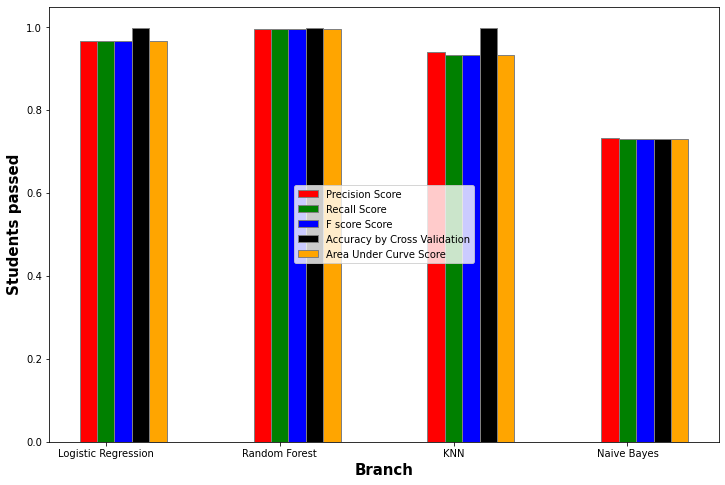

In [96]:
barWidth=0.1
fig=plt.subplots(figsize=(12,8))
br1=np.arange(len(prec))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br5=[x+barWidth for x in br4]
#br6=[x+barWidth for x in br5]
plt.bar(br1,prec, color='r',width=barWidth,edgecolor='grey',label='Precision Score')
plt.bar(br2,rec,color='g',width=barWidth,edgecolor='grey',label='Recall Score')
plt.bar(br3,fsco, color='b',width=barWidth,edgecolor='grey',label='F score Score')
plt.bar(br4,accu, color='black',width=barWidth,edgecolor='grey',label='Accuracy by Cross Validation')
plt.bar(br5,auc,color='orange',width=barWidth,edgecolor='grey',label='Area Under Curve Score')
#plt.bar(br6,log_loss,color='pink',width=barWidth,edgecolor='grey',label='Log Loss Score')
plt.xlabel('Branch',fontweight='bold',fontsize=15)
plt.ylabel('Students passed',fontweight='bold',fontsize=15)
plt.xticks([r+barWidth for r in range(len(prec))],['Logistic Regression','Random Forest','KNN','Naive Bayes'])

plt.legend(fontsize=10,loc='center')
plt.show()

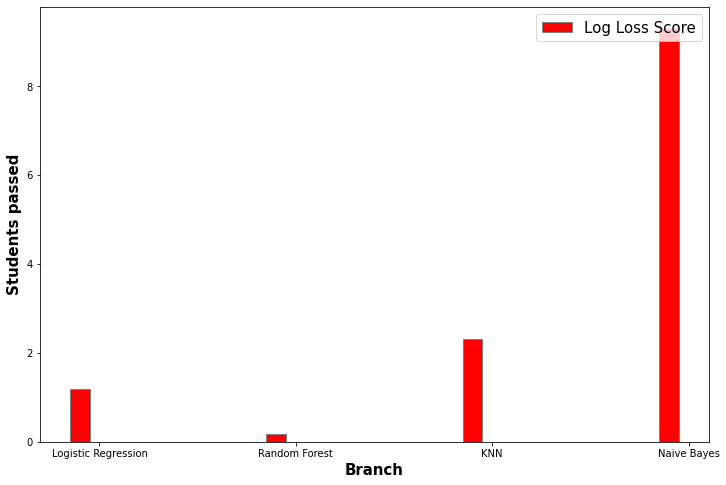

In [97]:
barWidth_1=0.1
fig=plt.subplots(figsize=(12,8))
br6=np.arange(len(log_loss))

plt.bar(br6,log_loss, color='r',width=barWidth,edgecolor='grey',label='Log Loss Score')

plt.xlabel('Branch',fontweight='bold',fontsize=15)
plt.ylabel('Students passed',fontweight='bold',fontsize=15)
plt.xticks([r+barWidth for r in range(len(prec))],['Logistic Regression','Random Forest','KNN','Naive Bayes'])

plt.legend(fontsize=15,loc='upper right')
plt.show()